In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from decimal import Decimal

In [2]:
def get_data(filename):
    elements = np.zeros((4, 3),dtype=float)  #先建立一個 4x3的全零方陣A，並且資料的型別設定為float浮點型
    f = open(filename)        #開啟資料檔案檔案
    lines = f.readlines()      #把全部資料檔案讀到一個列表lines中
    row = 0            #矩陣的行，從0行開始
    lineNum = 0
    for line in lines:       #把lines中的資料逐行讀取出來
        if(lineNum==0):    
            lineNum += 1
            continue
        list = line.strip('\n').split('\t') #處理逐行資料：strip表示把頭尾的'\n'去掉，split表示以\t分割行資料，然後把處理後的行資料返回到list列表中
        elements[row:] = list[0:3]        #把處理後的資料放到方陣A中。list[0:3]表示列表的0~2列資料放到矩陣中的row行
        row+=1
    return elements #回傳矩陣資料

In [3]:
def get_delta_w(x, w, y, t, learnRate):
    return learnRate*(t-y)*x

# activation function：sigmoid function
def sigmoid(x):
    return  1 / (1 + np.exp(-x))

# activation function：step function
def step_func(x):
    y = x > 0
    return y.astype(np.int)

# activation function：relu function
def relu(x):
    return np.maximum(0, x)

def activation(x, w):
#     return step_func(np.dot(x, w))
#     return relu(np.dot(x, w))
    return sigmoid(np.dot(x, w))

def train(epoch, x, theta, w, t, learnRate):
    endPoint = 0
    for j in range(epoch):
        for i in range(4):
            X = np.array([x[i, 0], x[i, 1], theta])
            y = activation(X, w)
            ans = '{0:1d}\t{1:.0f}\t{2:.0f}\t{3:.2f}\t{4:.2f}\t{5:.0f}\t{6:.2f}\t{7:.2f}'.format(j*4+i, X[0], X[1], w[0], w[1], t[i], y, t[i]-y)
            delta_w = np.array([get_delta_w(X[0], w[0], y, t[i], learnRate), get_delta_w(X[1], w[1], y, t[i], learnRate), get_delta_w(X[2], w[2], y, t[i], learnRate)])            
            w = np.array([w[0] + delta_w[0], w[1] + delta_w[1], w[2] + delta_w[2]])
            ans2 = '{0:.2f}\t{1:.2f}'.format(w[0], w[1])
            print(ans, '\t', ans2)
    #         print('  *delta_w: ', delta_w)
            endPoint = t[i]-y

        if(endPoint<=0.001):
            print('  *final_w: ', w)
            
            for i in range(4):         
                X = np.array([x[i, 0], x[i, 1], theta])
                y = activation(X, w)
                Y = sigmoid(y) 
                print("AND",X,Y)
                
            setFig(theta, w, x)
            drawFig("OR")
            break

def setFig(b, w, x):
    plt.xlabel("x1")
    plt.ylabel("x2")
    
#     n = 560
#     x1 = np.linspace(-0.5,2,n)
#     x2 = np.linspace(-0.5,2,n)
#     X,Y = np.meshgrid(x1, x2) # 生成網格
#     f = X*w[0] + Y*w[1] + b*w[2]
#     plt.contourf(X, Y, f, 0, alpha=.8)
#     f = (w[2]-w[0]*x)/w[1]
    X = np.arange(-3,3,0.1)
    Y = (-w[2]*b-w[0]*X)/w[1]
    plt.plot(X,Y)
    
def drawFig(title):
    plt.title(title + " Gate")
    plt.scatter(0,0, color='r', marker='o', label='target0')
    plt.scatter(0,1, color='b', marker='*', label='target1')
    plt.scatter(1,0, color='b', marker='*', label='target1')
    plt.scatter(1,1, color='b', marker='*', label='target1')
    plt.show()

input w0: 0.1
input w1: 0.4
input w2: 0.4
input learnRate: 0.9
Epoch	輸入x1	輸入x2	初始w1	初始w2	期望T	實際Y	誤差E	修正後w1	修正後w2
0	1	1	0.40	0.40	1	0.71	0.29 	 0.66	0.66
1	0	0	0.66	0.66	0	0.59	-0.59 	 0.66	0.66
2	1	0	0.66	0.66	1	0.62	0.38 	 1.00	0.66
3	0	1	1.00	0.66	1	0.70	0.30 	 1.00	0.93
4	1	1	1.00	0.93	1	0.92	0.08 	 1.08	1.01
5	0	0	1.08	1.01	0	0.63	-0.63 	 1.08	1.01
6	1	0	1.08	1.01	1	0.74	0.26 	 1.31	1.01
7	0	1	1.31	1.01	1	0.77	0.23 	 1.31	1.22
8	1	1	1.31	1.22	1	0.95	0.05 	 1.36	1.26
9	0	0	1.36	1.26	0	0.61	-0.61 	 1.36	1.26
10	1	0	1.36	1.26	1	0.78	0.22 	 1.56	1.26
11	0	1	1.56	1.26	1	0.80	0.20 	 1.56	1.45
12	1	1	1.56	1.45	1	0.96	0.04 	 1.59	1.48
13	0	0	1.59	1.48	0	0.58	-0.58 	 1.59	1.48
14	1	0	1.59	1.48	1	0.80	0.20 	 1.77	1.48
15	0	1	1.77	1.48	1	0.81	0.19 	 1.77	1.65
16	1	1	1.77	1.65	1	0.97	0.03 	 1.80	1.67
17	0	0	1.80	1.67	0	0.54	-0.54 	 1.80	1.67
18	1	0	1.80	1.67	1	0.81	0.19 	 1.96	1.67
19	0	1	1.96	1.67	1	0.82	0.18 	 1.96	1.84
20	1	1	1.96	1.84	1	0.98	0.02 	 1.98	1.86
21	0	0	1.98	1.86	0	0.51	-0.51 	

320	1	1	6.27	6.23	1	1.00	0.00 	 6.27	6.23
321	0	0	6.27	6.23	0	0.07	-0.07 	 6.27	6.23
322	1	0	6.27	6.23	1	0.97	0.03 	 6.30	6.23
323	0	1	6.30	6.23	1	0.97	0.03 	 6.30	6.25
324	1	1	6.30	6.25	1	1.00	0.00 	 6.30	6.25
325	0	0	6.30	6.25	0	0.07	-0.07 	 6.30	6.25
326	1	0	6.30	6.25	1	0.97	0.03 	 6.32	6.25
327	0	1	6.32	6.25	1	0.97	0.03 	 6.32	6.28
328	1	1	6.32	6.28	1	1.00	0.00 	 6.32	6.28
329	0	0	6.32	6.28	0	0.07	-0.07 	 6.32	6.28
330	1	0	6.32	6.28	1	0.97	0.03 	 6.34	6.28
331	0	1	6.34	6.28	1	0.97	0.03 	 6.34	6.30
332	1	1	6.34	6.30	1	1.00	0.00 	 6.34	6.30
333	0	0	6.34	6.30	0	0.07	-0.07 	 6.34	6.30
334	1	0	6.34	6.30	1	0.97	0.03 	 6.37	6.30
335	0	1	6.37	6.30	1	0.97	0.03 	 6.37	6.33
336	1	1	6.37	6.33	1	1.00	0.00 	 6.37	6.33
337	0	0	6.37	6.33	0	0.07	-0.07 	 6.37	6.33
338	1	0	6.37	6.33	1	0.97	0.03 	 6.39	6.33
339	0	1	6.39	6.33	1	0.97	0.03 	 6.39	6.35
340	1	1	6.39	6.35	1	1.00	0.00 	 6.39	6.35
341	0	0	6.39	6.35	0	0.06	-0.06 	 6.39	6.35
342	1	0	6.39	6.35	1	0.97	0.03 	 6.41	6.35
343	0	1	6.41	6.35	1	0.97	0.0

653	0	0	7.67	7.65	0	0.03	-0.03 	 7.67	7.65
654	1	0	7.67	7.65	1	0.99	0.01 	 7.68	7.65
655	0	1	7.68	7.65	1	0.99	0.01 	 7.68	7.66
656	1	1	7.68	7.66	1	1.00	0.00 	 7.68	7.66
657	0	0	7.68	7.66	0	0.03	-0.03 	 7.68	7.66
658	1	0	7.68	7.66	1	0.99	0.01 	 7.69	7.66
659	0	1	7.69	7.66	1	0.99	0.01 	 7.69	7.67
660	1	1	7.69	7.67	1	1.00	0.00 	 7.69	7.67
661	0	0	7.69	7.67	0	0.03	-0.03 	 7.69	7.67
662	1	0	7.69	7.67	1	0.99	0.01 	 7.71	7.67
663	0	1	7.71	7.67	1	0.99	0.01 	 7.71	7.68
664	1	1	7.71	7.68	1	1.00	0.00 	 7.71	7.68
665	0	0	7.71	7.68	0	0.03	-0.03 	 7.71	7.68
666	1	0	7.71	7.68	1	0.99	0.01 	 7.72	7.68
667	0	1	7.72	7.68	1	0.99	0.01 	 7.72	7.70
668	1	1	7.72	7.70	1	1.00	0.00 	 7.72	7.70
669	0	0	7.72	7.70	0	0.03	-0.03 	 7.72	7.70
670	1	0	7.72	7.70	1	0.99	0.01 	 7.73	7.70
671	0	1	7.73	7.70	1	0.99	0.01 	 7.73	7.71
672	1	1	7.73	7.71	1	1.00	0.00 	 7.73	7.71
673	0	0	7.73	7.71	0	0.03	-0.03 	 7.73	7.71
674	1	0	7.73	7.71	1	0.99	0.01 	 7.74	7.71
675	0	1	7.74	7.71	1	0.99	0.01 	 7.74	7.72
676	1	1	7.74	7.72	1	1.00	0.0

986	1	0	8.49	8.47	1	0.99	0.01 	 8.50	8.47
987	0	1	8.50	8.47	1	0.99	0.01 	 8.50	8.48
988	1	1	8.50	8.48	1	1.00	0.00 	 8.50	8.48
989	0	0	8.50	8.48	0	0.02	-0.02 	 8.50	8.48
990	1	0	8.50	8.48	1	0.99	0.01 	 8.51	8.48
991	0	1	8.51	8.48	1	0.99	0.01 	 8.51	8.49
992	1	1	8.51	8.49	1	1.00	0.00 	 8.51	8.49
993	0	0	8.51	8.49	0	0.02	-0.02 	 8.51	8.49
994	1	0	8.51	8.49	1	0.99	0.01 	 8.51	8.49
995	0	1	8.51	8.49	1	0.99	0.01 	 8.51	8.50
996	1	1	8.51	8.50	1	1.00	0.00 	 8.51	8.50
997	0	0	8.51	8.50	0	0.02	-0.02 	 8.51	8.50
998	1	0	8.51	8.50	1	0.99	0.01 	 8.52	8.50
999	0	1	8.52	8.50	1	0.99	0.01 	 8.52	8.51
1000	1	1	8.52	8.51	1	1.00	0.00 	 8.52	8.51
1001	0	0	8.52	8.51	0	0.02	-0.02 	 8.52	8.51
1002	1	0	8.52	8.51	1	0.99	0.01 	 8.53	8.51
1003	0	1	8.53	8.51	1	0.99	0.01 	 8.53	8.51
1004	1	1	8.53	8.51	1	1.00	0.00 	 8.53	8.51
1005	0	0	8.53	8.51	0	0.02	-0.02 	 8.53	8.51
1006	1	0	8.53	8.51	1	0.99	0.01 	 8.54	8.51
1007	0	1	8.54	8.51	1	0.99	0.01 	 8.54	8.52
1008	1	1	8.54	8.52	1	1.00	0.00 	 8.54	8.52
1009	0	0	8.54	8.52	0

1319	0	1	9.08	9.06	1	0.99	0.01 	 9.08	9.06
1320	1	1	9.08	9.06	1	1.00	0.00 	 9.08	9.06
1321	0	0	9.08	9.06	0	0.02	-0.02 	 9.08	9.06
1322	1	0	9.08	9.06	1	0.99	0.01 	 9.08	9.06
1323	0	1	9.08	9.06	1	0.99	0.01 	 9.08	9.07
1324	1	1	9.08	9.07	1	1.00	0.00 	 9.08	9.07
1325	0	0	9.08	9.07	0	0.02	-0.02 	 9.08	9.07
1326	1	0	9.08	9.07	1	0.99	0.01 	 9.09	9.07
1327	0	1	9.09	9.07	1	0.99	0.01 	 9.09	9.08
1328	1	1	9.09	9.08	1	1.00	0.00 	 9.09	9.08
1329	0	0	9.09	9.08	0	0.02	-0.02 	 9.09	9.08
1330	1	0	9.09	9.08	1	0.99	0.01 	 9.09	9.08
1331	0	1	9.09	9.08	1	0.99	0.01 	 9.09	9.08
1332	1	1	9.09	9.08	1	1.00	0.00 	 9.09	9.08
1333	0	0	9.09	9.08	0	0.02	-0.02 	 9.09	9.08
1334	1	0	9.09	9.08	1	0.99	0.01 	 9.10	9.08
1335	0	1	9.10	9.08	1	0.99	0.01 	 9.10	9.09
1336	1	1	9.10	9.09	1	1.00	0.00 	 9.10	9.09
1337	0	0	9.10	9.09	0	0.02	-0.02 	 9.10	9.09
1338	1	0	9.10	9.09	1	0.99	0.01 	 9.11	9.09
1339	0	1	9.11	9.09	1	0.99	0.01 	 9.11	9.09
1340	1	1	9.11	9.09	1	1.00	0.00 	 9.11	9.09
1341	0	0	9.11	9.09	0	0.02	-0.02 	 9.11	9.09
1342	

1652	1	1	9.52	9.51	1	1.00	0.00 	 9.52	9.51
1653	0	0	9.52	9.51	0	0.01	-0.01 	 9.52	9.51
1654	1	0	9.52	9.51	1	0.99	0.01 	 9.53	9.51
1655	0	1	9.53	9.51	1	0.99	0.01 	 9.53	9.52
1656	1	1	9.53	9.52	1	1.00	0.00 	 9.53	9.52
1657	0	0	9.53	9.52	0	0.01	-0.01 	 9.53	9.52
1658	1	0	9.53	9.52	1	0.99	0.01 	 9.53	9.52
1659	0	1	9.53	9.52	1	0.99	0.01 	 9.53	9.52
1660	1	1	9.53	9.52	1	1.00	0.00 	 9.53	9.52
1661	0	0	9.53	9.52	0	0.01	-0.01 	 9.53	9.52
1662	1	0	9.53	9.52	1	0.99	0.01 	 9.54	9.52
1663	0	1	9.54	9.52	1	0.99	0.01 	 9.54	9.53
1664	1	1	9.54	9.53	1	1.00	0.00 	 9.54	9.53
1665	0	0	9.54	9.53	0	0.01	-0.01 	 9.54	9.53
1666	1	0	9.54	9.53	1	0.99	0.01 	 9.54	9.53
1667	0	1	9.54	9.53	1	0.99	0.01 	 9.54	9.53
1668	1	1	9.54	9.53	1	1.00	0.00 	 9.54	9.53
1669	0	0	9.54	9.53	0	0.01	-0.01 	 9.54	9.53
1670	1	0	9.54	9.53	1	0.99	0.01 	 9.55	9.53
1671	0	1	9.55	9.53	1	0.99	0.01 	 9.55	9.54
1672	1	1	9.55	9.54	1	1.00	0.00 	 9.55	9.54
1673	0	0	9.55	9.54	0	0.01	-0.01 	 9.55	9.54
1674	1	0	9.55	9.54	1	0.99	0.01 	 9.55	9.54
1675	

1985	0	0	9.89	9.88	0	0.01	-0.01 	 9.89	9.88
1986	1	0	9.89	9.88	1	1.00	0.00 	 9.89	9.88
1987	0	1	9.89	9.88	1	1.00	0.00 	 9.89	9.89
1988	1	1	9.89	9.89	1	1.00	0.00 	 9.89	9.89
1989	0	0	9.89	9.89	0	0.01	-0.01 	 9.89	9.89
1990	1	0	9.89	9.89	1	1.00	0.00 	 9.90	9.89
1991	0	1	9.90	9.89	1	1.00	0.00 	 9.90	9.89
1992	1	1	9.90	9.89	1	1.00	0.00 	 9.90	9.89
1993	0	0	9.90	9.89	0	0.01	-0.01 	 9.90	9.89
1994	1	0	9.90	9.89	1	1.00	0.00 	 9.90	9.89
1995	0	1	9.90	9.89	1	1.00	0.00 	 9.90	9.89
1996	1	1	9.90	9.89	1	1.00	0.00 	 9.90	9.89
1997	0	0	9.90	9.89	0	0.01	-0.01 	 9.90	9.89
1998	1	0	9.90	9.89	1	1.00	0.00 	 9.91	9.89
1999	0	1	9.91	9.89	1	1.00	0.00 	 9.91	9.90
2000	1	1	9.91	9.90	1	1.00	0.00 	 9.91	9.90
2001	0	0	9.91	9.90	0	0.01	-0.01 	 9.91	9.90
2002	1	0	9.91	9.90	1	1.00	0.00 	 9.91	9.90
2003	0	1	9.91	9.90	1	1.00	0.00 	 9.91	9.90
2004	1	1	9.91	9.90	1	1.00	0.00 	 9.91	9.90
2005	0	0	9.91	9.90	0	0.01	-0.01 	 9.91	9.90
2006	1	0	9.91	9.90	1	1.00	0.00 	 9.91	9.90
2007	0	1	9.91	9.90	1	1.00	0.00 	 9.91	9.91
2008	

2319	0	1	10.20	10.19	1	1.00	0.00 	 10.20	10.20
2320	1	1	10.20	10.20	1	1.00	0.00 	 10.20	10.20
2321	0	0	10.20	10.20	0	0.01	-0.01 	 10.20	10.20
2322	1	0	10.20	10.20	1	1.00	0.00 	 10.21	10.20
2323	0	1	10.21	10.20	1	1.00	0.00 	 10.21	10.20
2324	1	1	10.21	10.20	1	1.00	0.00 	 10.21	10.20
2325	0	0	10.21	10.20	0	0.01	-0.01 	 10.21	10.20
2326	1	0	10.21	10.20	1	1.00	0.00 	 10.21	10.20
2327	0	1	10.21	10.20	1	1.00	0.00 	 10.21	10.20
2328	1	1	10.21	10.20	1	1.00	0.00 	 10.21	10.20
2329	0	0	10.21	10.20	0	0.01	-0.01 	 10.21	10.20
2330	1	0	10.21	10.20	1	1.00	0.00 	 10.21	10.20
2331	0	1	10.21	10.20	1	1.00	0.00 	 10.21	10.21
2332	1	1	10.21	10.21	1	1.00	0.00 	 10.21	10.21
2333	0	0	10.21	10.21	0	0.01	-0.01 	 10.21	10.21
2334	1	0	10.21	10.21	1	1.00	0.00 	 10.22	10.21
2335	0	1	10.22	10.21	1	1.00	0.00 	 10.22	10.21
2336	1	1	10.22	10.21	1	1.00	0.00 	 10.22	10.21
2337	0	0	10.22	10.21	0	0.01	-0.01 	 10.22	10.21
2338	1	0	10.22	10.21	1	1.00	0.00 	 10.22	10.21
2339	0	1	10.22	10.21	1	1.00	0.00 	 10.22	10.21
2340	1	1

2652	1	1	10.47	10.47	1	1.00	0.00 	 10.47	10.47
2653	0	0	10.47	10.47	0	0.01	-0.01 	 10.47	10.47
2654	1	0	10.47	10.47	1	1.00	0.00 	 10.47	10.47
2655	0	1	10.47	10.47	1	1.00	0.00 	 10.47	10.47
2656	1	1	10.47	10.47	1	1.00	0.00 	 10.47	10.47
2657	0	0	10.47	10.47	0	0.01	-0.01 	 10.47	10.47
2658	1	0	10.47	10.47	1	1.00	0.00 	 10.48	10.47
2659	0	1	10.48	10.47	1	1.00	0.00 	 10.48	10.47
2660	1	1	10.48	10.47	1	1.00	0.00 	 10.48	10.47
2661	0	0	10.48	10.47	0	0.01	-0.01 	 10.48	10.47
2662	1	0	10.48	10.47	1	1.00	0.00 	 10.48	10.47
2663	0	1	10.48	10.47	1	1.00	0.00 	 10.48	10.47
2664	1	1	10.48	10.47	1	1.00	0.00 	 10.48	10.47
2665	0	0	10.48	10.47	0	0.01	-0.01 	 10.48	10.47
2666	1	0	10.48	10.47	1	1.00	0.00 	 10.48	10.47
2667	0	1	10.48	10.47	1	1.00	0.00 	 10.48	10.48
2668	1	1	10.48	10.48	1	1.00	0.00 	 10.48	10.48
2669	0	0	10.48	10.48	0	0.01	-0.01 	 10.48	10.48
2670	1	0	10.48	10.48	1	1.00	0.00 	 10.49	10.48
2671	0	1	10.49	10.48	1	1.00	0.00 	 10.49	10.48
2672	1	1	10.49	10.48	1	1.00	0.00 	 10.49	10.48
2673	0	0

2985	0	0	10.71	10.70	0	0.01	-0.01 	 10.71	10.70
2986	1	0	10.71	10.70	1	1.00	0.00 	 10.71	10.70
2987	0	1	10.71	10.70	1	1.00	0.00 	 10.71	10.71
2988	1	1	10.71	10.71	1	1.00	0.00 	 10.71	10.71
2989	0	0	10.71	10.71	0	0.01	-0.01 	 10.71	10.71
2990	1	0	10.71	10.71	1	1.00	0.00 	 10.71	10.71
2991	0	1	10.71	10.71	1	1.00	0.00 	 10.71	10.71
2992	1	1	10.71	10.71	1	1.00	0.00 	 10.71	10.71
2993	0	0	10.71	10.71	0	0.01	-0.01 	 10.71	10.71
2994	1	0	10.71	10.71	1	1.00	0.00 	 10.72	10.71
2995	0	1	10.72	10.71	1	1.00	0.00 	 10.72	10.71
2996	1	1	10.72	10.71	1	1.00	0.00 	 10.72	10.71
2997	0	0	10.72	10.71	0	0.01	-0.01 	 10.72	10.71
2998	1	0	10.72	10.71	1	1.00	0.00 	 10.72	10.71
2999	0	1	10.72	10.71	1	1.00	0.00 	 10.72	10.71
3000	1	1	10.72	10.71	1	1.00	0.00 	 10.72	10.71
3001	0	0	10.72	10.71	0	0.01	-0.01 	 10.72	10.71
3002	1	0	10.72	10.71	1	1.00	0.00 	 10.72	10.71
3003	0	1	10.72	10.71	1	1.00	0.00 	 10.72	10.72
3004	1	1	10.72	10.72	1	1.00	0.00 	 10.72	10.72
3005	0	0	10.72	10.72	0	0.01	-0.01 	 10.72	10.72
3006	1	

3318	1	0	10.92	10.91	1	1.00	0.00 	 10.92	10.91
3319	0	1	10.92	10.91	1	1.00	0.00 	 10.92	10.92
3320	1	1	10.92	10.92	1	1.00	0.00 	 10.92	10.92
3321	0	0	10.92	10.92	0	0.01	-0.01 	 10.92	10.92
3322	1	0	10.92	10.92	1	1.00	0.00 	 10.92	10.92
3323	0	1	10.92	10.92	1	1.00	0.00 	 10.92	10.92
3324	1	1	10.92	10.92	1	1.00	0.00 	 10.92	10.92
3325	0	0	10.92	10.92	0	0.01	-0.01 	 10.92	10.92
3326	1	0	10.92	10.92	1	1.00	0.00 	 10.93	10.92
3327	0	1	10.93	10.92	1	1.00	0.00 	 10.93	10.92
3328	1	1	10.93	10.92	1	1.00	0.00 	 10.93	10.92
3329	0	0	10.93	10.92	0	0.01	-0.01 	 10.93	10.92
3330	1	0	10.93	10.92	1	1.00	0.00 	 10.93	10.92
3331	0	1	10.93	10.92	1	1.00	0.00 	 10.93	10.92
3332	1	1	10.93	10.92	1	1.00	0.00 	 10.93	10.92
3333	0	0	10.93	10.92	0	0.01	-0.01 	 10.93	10.92
3334	1	0	10.93	10.92	1	1.00	0.00 	 10.93	10.92
3335	0	1	10.93	10.92	1	1.00	0.00 	 10.93	10.93
3336	1	1	10.93	10.93	1	1.00	0.00 	 10.93	10.93
3337	0	0	10.93	10.93	0	0.01	-0.01 	 10.93	10.93
3338	1	0	10.93	10.93	1	1.00	0.00 	 10.93	10.93
3339	0	1

3651	0	1	11.11	11.11	1	1.00	0.00 	 11.11	11.11
3652	1	1	11.11	11.11	1	1.00	0.00 	 11.11	11.11
3653	0	0	11.11	11.11	0	0.01	-0.01 	 11.11	11.11
3654	1	0	11.11	11.11	1	1.00	0.00 	 11.12	11.11
3655	0	1	11.12	11.11	1	1.00	0.00 	 11.12	11.11
3656	1	1	11.12	11.11	1	1.00	0.00 	 11.12	11.11
3657	0	0	11.12	11.11	0	0.01	-0.01 	 11.12	11.11
3658	1	0	11.12	11.11	1	1.00	0.00 	 11.12	11.11
3659	0	1	11.12	11.11	1	1.00	0.00 	 11.12	11.11
3660	1	1	11.12	11.11	1	1.00	0.00 	 11.12	11.11
3661	0	0	11.12	11.11	0	0.01	-0.01 	 11.12	11.11
3662	1	0	11.12	11.11	1	1.00	0.00 	 11.12	11.11
3663	0	1	11.12	11.11	1	1.00	0.00 	 11.12	11.12
3664	1	1	11.12	11.12	1	1.00	0.00 	 11.12	11.12
3665	0	0	11.12	11.12	0	0.01	-0.01 	 11.12	11.12
3666	1	0	11.12	11.12	1	1.00	0.00 	 11.12	11.12
3667	0	1	11.12	11.12	1	1.00	0.00 	 11.12	11.12
3668	1	1	11.12	11.12	1	1.00	0.00 	 11.12	11.12
3669	0	0	11.12	11.12	0	0.01	-0.01 	 11.12	11.12
3670	1	0	11.12	11.12	1	1.00	0.00 	 11.12	11.12
3671	0	1	11.12	11.12	1	1.00	0.00 	 11.12	11.12
3672	1	1

3984	1	1	11.29	11.28	1	1.00	0.00 	 11.29	11.28
3985	0	0	11.29	11.28	0	0.01	-0.01 	 11.29	11.28
3986	1	0	11.29	11.28	1	1.00	0.00 	 11.29	11.28
3987	0	1	11.29	11.28	1	1.00	0.00 	 11.29	11.29
3988	1	1	11.29	11.29	1	1.00	0.00 	 11.29	11.29
3989	0	0	11.29	11.29	0	0.01	-0.01 	 11.29	11.29
3990	1	0	11.29	11.29	1	1.00	0.00 	 11.29	11.29
3991	0	1	11.29	11.29	1	1.00	0.00 	 11.29	11.29
3992	1	1	11.29	11.29	1	1.00	0.00 	 11.29	11.29
3993	0	0	11.29	11.29	0	0.01	-0.01 	 11.29	11.29
3994	1	0	11.29	11.29	1	1.00	0.00 	 11.29	11.29
3995	0	1	11.29	11.29	1	1.00	0.00 	 11.29	11.29
3996	1	1	11.29	11.29	1	1.00	0.00 	 11.29	11.29
3997	0	0	11.29	11.29	0	0.01	-0.01 	 11.29	11.29
3998	1	0	11.29	11.29	1	1.00	0.00 	 11.30	11.29
3999	0	1	11.30	11.29	1	1.00	0.00 	 11.30	11.29
4000	1	1	11.30	11.29	1	1.00	0.00 	 11.30	11.29
4001	0	0	11.30	11.29	0	0.01	-0.01 	 11.30	11.29
4002	1	0	11.30	11.29	1	1.00	0.00 	 11.30	11.29
4003	0	1	11.30	11.29	1	1.00	0.00 	 11.30	11.29
4004	1	1	11.30	11.29	1	1.00	0.00 	 11.30	11.29
4005	0	0

4318	1	0	11.45	11.44	1	1.00	0.00 	 11.45	11.44
4319	0	1	11.45	11.44	1	1.00	0.00 	 11.45	11.45
4320	1	1	11.45	11.45	1	1.00	0.00 	 11.45	11.45
4321	0	0	11.45	11.45	0	0.01	-0.01 	 11.45	11.45
4322	1	0	11.45	11.45	1	1.00	0.00 	 11.45	11.45
4323	0	1	11.45	11.45	1	1.00	0.00 	 11.45	11.45
4324	1	1	11.45	11.45	1	1.00	0.00 	 11.45	11.45
4325	0	0	11.45	11.45	0	0.01	-0.01 	 11.45	11.45
4326	1	0	11.45	11.45	1	1.00	0.00 	 11.45	11.45
4327	0	1	11.45	11.45	1	1.00	0.00 	 11.45	11.45
4328	1	1	11.45	11.45	1	1.00	0.00 	 11.45	11.45
4329	0	0	11.45	11.45	0	0.01	-0.01 	 11.45	11.45
4330	1	0	11.45	11.45	1	1.00	0.00 	 11.45	11.45
4331	0	1	11.45	11.45	1	1.00	0.00 	 11.45	11.45
4332	1	1	11.45	11.45	1	1.00	0.00 	 11.45	11.45
4333	0	0	11.45	11.45	0	0.01	-0.01 	 11.45	11.45
4334	1	0	11.45	11.45	1	1.00	0.00 	 11.46	11.45
4335	0	1	11.46	11.45	1	1.00	0.00 	 11.46	11.45
4336	1	1	11.46	11.45	1	1.00	0.00 	 11.46	11.45
4337	0	0	11.46	11.45	0	0.01	-0.01 	 11.46	11.45
4338	1	0	11.46	11.45	1	1.00	0.00 	 11.46	11.45
4339	0	1

4651	0	1	11.60	11.59	1	1.00	0.00 	 11.60	11.59
4652	1	1	11.60	11.59	1	1.00	0.00 	 11.60	11.59
4653	0	0	11.60	11.59	0	0.00	-0.00 	 11.60	11.59
4654	1	0	11.60	11.59	1	1.00	0.00 	 11.60	11.59
4655	0	1	11.60	11.59	1	1.00	0.00 	 11.60	11.60
4656	1	1	11.60	11.60	1	1.00	0.00 	 11.60	11.60
4657	0	0	11.60	11.60	0	0.00	-0.00 	 11.60	11.60
4658	1	0	11.60	11.60	1	1.00	0.00 	 11.60	11.60
4659	0	1	11.60	11.60	1	1.00	0.00 	 11.60	11.60
4660	1	1	11.60	11.60	1	1.00	0.00 	 11.60	11.60
4661	0	0	11.60	11.60	0	0.00	-0.00 	 11.60	11.60
4662	1	0	11.60	11.60	1	1.00	0.00 	 11.60	11.60
4663	0	1	11.60	11.60	1	1.00	0.00 	 11.60	11.60
4664	1	1	11.60	11.60	1	1.00	0.00 	 11.60	11.60
4665	0	0	11.60	11.60	0	0.00	-0.00 	 11.60	11.60
4666	1	0	11.60	11.60	1	1.00	0.00 	 11.60	11.60
4667	0	1	11.60	11.60	1	1.00	0.00 	 11.60	11.60
4668	1	1	11.60	11.60	1	1.00	0.00 	 11.60	11.60
4669	0	0	11.60	11.60	0	0.00	-0.00 	 11.60	11.60
4670	1	0	11.60	11.60	1	1.00	0.00 	 11.61	11.60
4671	0	1	11.61	11.60	1	1.00	0.00 	 11.61	11.60
4672	1	1

4984	1	1	11.74	11.73	1	1.00	0.00 	 11.74	11.73
4985	0	0	11.74	11.73	0	0.00	-0.00 	 11.74	11.73
4986	1	0	11.74	11.73	1	1.00	0.00 	 11.74	11.73
4987	0	1	11.74	11.73	1	1.00	0.00 	 11.74	11.73
4988	1	1	11.74	11.73	1	1.00	0.00 	 11.74	11.73
4989	0	0	11.74	11.73	0	0.00	-0.00 	 11.74	11.73
4990	1	0	11.74	11.73	1	1.00	0.00 	 11.74	11.73
4991	0	1	11.74	11.73	1	1.00	0.00 	 11.74	11.74
4992	1	1	11.74	11.74	1	1.00	0.00 	 11.74	11.74
4993	0	0	11.74	11.74	0	0.00	-0.00 	 11.74	11.74
4994	1	0	11.74	11.74	1	1.00	0.00 	 11.74	11.74
4995	0	1	11.74	11.74	1	1.00	0.00 	 11.74	11.74
4996	1	1	11.74	11.74	1	1.00	0.00 	 11.74	11.74
4997	0	0	11.74	11.74	0	0.00	-0.00 	 11.74	11.74
4998	1	0	11.74	11.74	1	1.00	0.00 	 11.74	11.74
4999	0	1	11.74	11.74	1	1.00	0.00 	 11.74	11.74
5000	1	1	11.74	11.74	1	1.00	0.00 	 11.74	11.74
5001	0	0	11.74	11.74	0	0.00	-0.00 	 11.74	11.74
5002	1	0	11.74	11.74	1	1.00	0.00 	 11.74	11.74
5003	0	1	11.74	11.74	1	1.00	0.00 	 11.74	11.74
5004	1	1	11.74	11.74	1	1.00	0.00 	 11.74	11.74
5005	0	0

5317	0	0	11.86	11.86	0	0.00	-0.00 	 11.86	11.86
5318	1	0	11.86	11.86	1	1.00	0.00 	 11.87	11.86
5319	0	1	11.87	11.86	1	1.00	0.00 	 11.87	11.86
5320	1	1	11.87	11.86	1	1.00	0.00 	 11.87	11.86
5321	0	0	11.87	11.86	0	0.00	-0.00 	 11.87	11.86
5322	1	0	11.87	11.86	1	1.00	0.00 	 11.87	11.86
5323	0	1	11.87	11.86	1	1.00	0.00 	 11.87	11.87
5324	1	1	11.87	11.87	1	1.00	0.00 	 11.87	11.87
5325	0	0	11.87	11.87	0	0.00	-0.00 	 11.87	11.87
5326	1	0	11.87	11.87	1	1.00	0.00 	 11.87	11.87
5327	0	1	11.87	11.87	1	1.00	0.00 	 11.87	11.87
5328	1	1	11.87	11.87	1	1.00	0.00 	 11.87	11.87
5329	0	0	11.87	11.87	0	0.00	-0.00 	 11.87	11.87
5330	1	0	11.87	11.87	1	1.00	0.00 	 11.87	11.87
5331	0	1	11.87	11.87	1	1.00	0.00 	 11.87	11.87
5332	1	1	11.87	11.87	1	1.00	0.00 	 11.87	11.87
5333	0	0	11.87	11.87	0	0.00	-0.00 	 11.87	11.87
5334	1	0	11.87	11.87	1	1.00	0.00 	 11.87	11.87
5335	0	1	11.87	11.87	1	1.00	0.00 	 11.87	11.87
5336	1	1	11.87	11.87	1	1.00	0.00 	 11.87	11.87
5337	0	0	11.87	11.87	0	0.00	-0.00 	 11.87	11.87
5338	1	

5650	1	0	11.99	11.98	1	1.00	0.00 	 11.99	11.98
5651	0	1	11.99	11.98	1	1.00	0.00 	 11.99	11.98
5652	1	1	11.99	11.98	1	1.00	0.00 	 11.99	11.98
5653	0	0	11.99	11.98	0	0.00	-0.00 	 11.99	11.98
5654	1	0	11.99	11.98	1	1.00	0.00 	 11.99	11.98
5655	0	1	11.99	11.98	1	1.00	0.00 	 11.99	11.99
5656	1	1	11.99	11.99	1	1.00	0.00 	 11.99	11.99
5657	0	0	11.99	11.99	0	0.00	-0.00 	 11.99	11.99
5658	1	0	11.99	11.99	1	1.00	0.00 	 11.99	11.99
5659	0	1	11.99	11.99	1	1.00	0.00 	 11.99	11.99
5660	1	1	11.99	11.99	1	1.00	0.00 	 11.99	11.99
5661	0	0	11.99	11.99	0	0.00	-0.00 	 11.99	11.99
5662	1	0	11.99	11.99	1	1.00	0.00 	 11.99	11.99
5663	0	1	11.99	11.99	1	1.00	0.00 	 11.99	11.99
5664	1	1	11.99	11.99	1	1.00	0.00 	 11.99	11.99
5665	0	0	11.99	11.99	0	0.00	-0.00 	 11.99	11.99
5666	1	0	11.99	11.99	1	1.00	0.00 	 11.99	11.99
5667	0	1	11.99	11.99	1	1.00	0.00 	 11.99	11.99
5668	1	1	11.99	11.99	1	1.00	0.00 	 11.99	11.99
5669	0	0	11.99	11.99	0	0.00	-0.00 	 11.99	11.99
5670	1	0	11.99	11.99	1	1.00	0.00 	 11.99	11.99
5671	0	1

5983	0	1	12.10	12.10	1	1.00	0.00 	 12.10	12.10
5984	1	1	12.10	12.10	1	1.00	0.00 	 12.10	12.10
5985	0	0	12.10	12.10	0	0.00	-0.00 	 12.10	12.10
5986	1	0	12.10	12.10	1	1.00	0.00 	 12.10	12.10
5987	0	1	12.10	12.10	1	1.00	0.00 	 12.10	12.10
5988	1	1	12.10	12.10	1	1.00	0.00 	 12.10	12.10
5989	0	0	12.10	12.10	0	0.00	-0.00 	 12.10	12.10
5990	1	0	12.10	12.10	1	1.00	0.00 	 12.10	12.10
5991	0	1	12.10	12.10	1	1.00	0.00 	 12.10	12.10
5992	1	1	12.10	12.10	1	1.00	0.00 	 12.10	12.10
5993	0	0	12.10	12.10	0	0.00	-0.00 	 12.10	12.10
5994	1	0	12.10	12.10	1	1.00	0.00 	 12.11	12.10
5995	0	1	12.11	12.10	1	1.00	0.00 	 12.11	12.10
5996	1	1	12.11	12.10	1	1.00	0.00 	 12.11	12.10
5997	0	0	12.11	12.10	0	0.00	-0.00 	 12.11	12.10
5998	1	0	12.11	12.10	1	1.00	0.00 	 12.11	12.10
5999	0	1	12.11	12.10	1	1.00	0.00 	 12.11	12.10
6000	1	1	12.11	12.10	1	1.00	0.00 	 12.11	12.10
6001	0	0	12.11	12.10	0	0.00	-0.00 	 12.11	12.10
6002	1	0	12.11	12.10	1	1.00	0.00 	 12.11	12.10
6003	0	1	12.11	12.10	1	1.00	0.00 	 12.11	12.11
6004	1	1

6317	0	0	12.21	12.21	0	0.00	-0.00 	 12.21	12.21
6318	1	0	12.21	12.21	1	1.00	0.00 	 12.21	12.21
6319	0	1	12.21	12.21	1	1.00	0.00 	 12.21	12.21
6320	1	1	12.21	12.21	1	1.00	0.00 	 12.21	12.21
6321	0	0	12.21	12.21	0	0.00	-0.00 	 12.21	12.21
6322	1	0	12.21	12.21	1	1.00	0.00 	 12.21	12.21
6323	0	1	12.21	12.21	1	1.00	0.00 	 12.21	12.21
6324	1	1	12.21	12.21	1	1.00	0.00 	 12.21	12.21
6325	0	0	12.21	12.21	0	0.00	-0.00 	 12.21	12.21
6326	1	0	12.21	12.21	1	1.00	0.00 	 12.21	12.21
6327	0	1	12.21	12.21	1	1.00	0.00 	 12.21	12.21
6328	1	1	12.21	12.21	1	1.00	0.00 	 12.21	12.21
6329	0	0	12.21	12.21	0	0.00	-0.00 	 12.21	12.21
6330	1	0	12.21	12.21	1	1.00	0.00 	 12.22	12.21
6331	0	1	12.22	12.21	1	1.00	0.00 	 12.22	12.21
6332	1	1	12.22	12.21	1	1.00	0.00 	 12.22	12.21
6333	0	0	12.22	12.21	0	0.00	-0.00 	 12.22	12.21
6334	1	0	12.22	12.21	1	1.00	0.00 	 12.22	12.21
6335	0	1	12.22	12.21	1	1.00	0.00 	 12.22	12.21
6336	1	1	12.22	12.21	1	1.00	0.00 	 12.22	12.21
6337	0	0	12.22	12.21	0	0.00	-0.00 	 12.22	12.21
6338	1	

6650	1	0	12.31	12.31	1	1.00	0.00 	 12.31	12.31
6651	0	1	12.31	12.31	1	1.00	0.00 	 12.31	12.31
6652	1	1	12.31	12.31	1	1.00	0.00 	 12.31	12.31
6653	0	0	12.31	12.31	0	0.00	-0.00 	 12.31	12.31
6654	1	0	12.31	12.31	1	1.00	0.00 	 12.32	12.31
6655	0	1	12.32	12.31	1	1.00	0.00 	 12.32	12.31
6656	1	1	12.32	12.31	1	1.00	0.00 	 12.32	12.31
6657	0	0	12.32	12.31	0	0.00	-0.00 	 12.32	12.31
6658	1	0	12.32	12.31	1	1.00	0.00 	 12.32	12.31
6659	0	1	12.32	12.31	1	1.00	0.00 	 12.32	12.31
6660	1	1	12.32	12.31	1	1.00	0.00 	 12.32	12.31
6661	0	0	12.32	12.31	0	0.00	-0.00 	 12.32	12.31
6662	1	0	12.32	12.31	1	1.00	0.00 	 12.32	12.31
6663	0	1	12.32	12.31	1	1.00	0.00 	 12.32	12.32
6664	1	1	12.32	12.32	1	1.00	0.00 	 12.32	12.32
6665	0	0	12.32	12.32	0	0.00	-0.00 	 12.32	12.32
6666	1	0	12.32	12.32	1	1.00	0.00 	 12.32	12.32
6667	0	1	12.32	12.32	1	1.00	0.00 	 12.32	12.32
6668	1	1	12.32	12.32	1	1.00	0.00 	 12.32	12.32
6669	0	0	12.32	12.32	0	0.00	-0.00 	 12.32	12.32
6670	1	0	12.32	12.32	1	1.00	0.00 	 12.32	12.32
6671	0	1

6983	0	1	12.41	12.41	1	1.00	0.00 	 12.41	12.41
6984	1	1	12.41	12.41	1	1.00	0.00 	 12.41	12.41
6985	0	0	12.41	12.41	0	0.00	-0.00 	 12.41	12.41
6986	1	0	12.41	12.41	1	1.00	0.00 	 12.41	12.41
6987	0	1	12.41	12.41	1	1.00	0.00 	 12.41	12.41
6988	1	1	12.41	12.41	1	1.00	0.00 	 12.41	12.41
6989	0	0	12.41	12.41	0	0.00	-0.00 	 12.41	12.41
6990	1	0	12.41	12.41	1	1.00	0.00 	 12.41	12.41
6991	0	1	12.41	12.41	1	1.00	0.00 	 12.41	12.41
6992	1	1	12.41	12.41	1	1.00	0.00 	 12.41	12.41
6993	0	0	12.41	12.41	0	0.00	-0.00 	 12.41	12.41
6994	1	0	12.41	12.41	1	1.00	0.00 	 12.42	12.41
6995	0	1	12.42	12.41	1	1.00	0.00 	 12.42	12.41
6996	1	1	12.42	12.41	1	1.00	0.00 	 12.42	12.41
6997	0	0	12.42	12.41	0	0.00	-0.00 	 12.42	12.41
6998	1	0	12.42	12.41	1	1.00	0.00 	 12.42	12.41
6999	0	1	12.42	12.41	1	1.00	0.00 	 12.42	12.41
7000	1	1	12.42	12.41	1	1.00	0.00 	 12.42	12.41
7001	0	0	12.42	12.41	0	0.00	-0.00 	 12.42	12.41
7002	1	0	12.42	12.41	1	1.00	0.00 	 12.42	12.41
7003	0	1	12.42	12.41	1	1.00	0.00 	 12.42	12.42
7004	1	1

7316	1	1	12.50	12.50	1	1.00	0.00 	 12.50	12.50
7317	0	0	12.50	12.50	0	0.00	-0.00 	 12.50	12.50
7318	1	0	12.50	12.50	1	1.00	0.00 	 12.51	12.50
7319	0	1	12.51	12.50	1	1.00	0.00 	 12.51	12.50
7320	1	1	12.51	12.50	1	1.00	0.00 	 12.51	12.50
7321	0	0	12.51	12.50	0	0.00	-0.00 	 12.51	12.50
7322	1	0	12.51	12.50	1	1.00	0.00 	 12.51	12.50
7323	0	1	12.51	12.50	1	1.00	0.00 	 12.51	12.50
7324	1	1	12.51	12.50	1	1.00	0.00 	 12.51	12.50
7325	0	0	12.51	12.50	0	0.00	-0.00 	 12.51	12.50
7326	1	0	12.51	12.50	1	1.00	0.00 	 12.51	12.50
7327	0	1	12.51	12.50	1	1.00	0.00 	 12.51	12.51
7328	1	1	12.51	12.51	1	1.00	0.00 	 12.51	12.51
7329	0	0	12.51	12.51	0	0.00	-0.00 	 12.51	12.51
7330	1	0	12.51	12.51	1	1.00	0.00 	 12.51	12.51
7331	0	1	12.51	12.51	1	1.00	0.00 	 12.51	12.51
7332	1	1	12.51	12.51	1	1.00	0.00 	 12.51	12.51
7333	0	0	12.51	12.51	0	0.00	-0.00 	 12.51	12.51
7334	1	0	12.51	12.51	1	1.00	0.00 	 12.51	12.51
7335	0	1	12.51	12.51	1	1.00	0.00 	 12.51	12.51
7336	1	1	12.51	12.51	1	1.00	0.00 	 12.51	12.51
7337	0	0

7649	0	0	12.59	12.59	0	0.00	-0.00 	 12.59	12.59
7650	1	0	12.59	12.59	1	1.00	0.00 	 12.59	12.59
7651	0	1	12.59	12.59	1	1.00	0.00 	 12.59	12.59
7652	1	1	12.59	12.59	1	1.00	0.00 	 12.59	12.59
7653	0	0	12.59	12.59	0	0.00	-0.00 	 12.59	12.59
7654	1	0	12.59	12.59	1	1.00	0.00 	 12.60	12.59
7655	0	1	12.60	12.59	1	1.00	0.00 	 12.60	12.59
7656	1	1	12.60	12.59	1	1.00	0.00 	 12.60	12.59
7657	0	0	12.60	12.59	0	0.00	-0.00 	 12.60	12.59
7658	1	0	12.60	12.59	1	1.00	0.00 	 12.60	12.59
7659	0	1	12.60	12.59	1	1.00	0.00 	 12.60	12.59
7660	1	1	12.60	12.59	1	1.00	0.00 	 12.60	12.59
7661	0	0	12.60	12.59	0	0.00	-0.00 	 12.60	12.59
7662	1	0	12.60	12.59	1	1.00	0.00 	 12.60	12.59
7663	0	1	12.60	12.59	1	1.00	0.00 	 12.60	12.60
7664	1	1	12.60	12.60	1	1.00	0.00 	 12.60	12.60
7665	0	0	12.60	12.60	0	0.00	-0.00 	 12.60	12.60
7666	1	0	12.60	12.60	1	1.00	0.00 	 12.60	12.60
7667	0	1	12.60	12.60	1	1.00	0.00 	 12.60	12.60
7668	1	1	12.60	12.60	1	1.00	0.00 	 12.60	12.60
7669	0	0	12.60	12.60	0	0.00	-0.00 	 12.60	12.60
7670	1	

7982	1	0	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7983	0	1	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7984	1	1	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7985	0	0	12.68	12.68	0	0.00	-0.00 	 12.68	12.68
7986	1	0	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7987	0	1	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7988	1	1	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7989	0	0	12.68	12.68	0	0.00	-0.00 	 12.68	12.68
7990	1	0	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7991	0	1	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7992	1	1	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7993	0	0	12.68	12.68	0	0.00	-0.00 	 12.68	12.68
7994	1	0	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7995	0	1	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7996	1	1	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7997	0	0	12.68	12.68	0	0.00	-0.00 	 12.68	12.68
7998	1	0	12.68	12.68	1	1.00	0.00 	 12.68	12.68
7999	0	1	12.68	12.68	1	1.00	0.00 	 12.68	12.68
8000	1	1	12.68	12.68	1	1.00	0.00 	 12.68	12.68
8001	0	0	12.68	12.68	0	0.00	-0.00 	 12.68	12.68
8002	1	0	12.68	12.68	1	1.00	0.00 	 12.68	12.68
8003	0	1

8316	1	1	12.76	12.76	1	1.00	0.00 	 12.76	12.76
8317	0	0	12.76	12.76	0	0.00	-0.00 	 12.76	12.76
8318	1	0	12.76	12.76	1	1.00	0.00 	 12.76	12.76
8319	0	1	12.76	12.76	1	1.00	0.00 	 12.76	12.76
8320	1	1	12.76	12.76	1	1.00	0.00 	 12.76	12.76
8321	0	0	12.76	12.76	0	0.00	-0.00 	 12.76	12.76
8322	1	0	12.76	12.76	1	1.00	0.00 	 12.76	12.76
8323	0	1	12.76	12.76	1	1.00	0.00 	 12.76	12.76
8324	1	1	12.76	12.76	1	1.00	0.00 	 12.76	12.76
8325	0	0	12.76	12.76	0	0.00	-0.00 	 12.76	12.76
8326	1	0	12.76	12.76	1	1.00	0.00 	 12.76	12.76
8327	0	1	12.76	12.76	1	1.00	0.00 	 12.76	12.76
8328	1	1	12.76	12.76	1	1.00	0.00 	 12.76	12.76
8329	0	0	12.76	12.76	0	0.00	-0.00 	 12.76	12.76
8330	1	0	12.76	12.76	1	1.00	0.00 	 12.77	12.76
8331	0	1	12.77	12.76	1	1.00	0.00 	 12.77	12.76
8332	1	1	12.77	12.76	1	1.00	0.00 	 12.77	12.76
8333	0	0	12.77	12.76	0	0.00	-0.00 	 12.77	12.76
8334	1	0	12.77	12.76	1	1.00	0.00 	 12.77	12.76
8335	0	1	12.77	12.76	1	1.00	0.00 	 12.77	12.76
8336	1	1	12.77	12.76	1	1.00	0.00 	 12.77	12.76
8337	0	0

8649	0	0	12.84	12.84	0	0.00	-0.00 	 12.84	12.84
8650	1	0	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8651	0	1	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8652	1	1	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8653	0	0	12.84	12.84	0	0.00	-0.00 	 12.84	12.84
8654	1	0	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8655	0	1	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8656	1	1	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8657	0	0	12.84	12.84	0	0.00	-0.00 	 12.84	12.84
8658	1	0	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8659	0	1	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8660	1	1	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8661	0	0	12.84	12.84	0	0.00	-0.00 	 12.84	12.84
8662	1	0	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8663	0	1	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8664	1	1	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8665	0	0	12.84	12.84	0	0.00	-0.00 	 12.84	12.84
8666	1	0	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8667	0	1	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8668	1	1	12.84	12.84	1	1.00	0.00 	 12.84	12.84
8669	0	0	12.84	12.84	0	0.00	-0.00 	 12.84	12.84
8670	1	

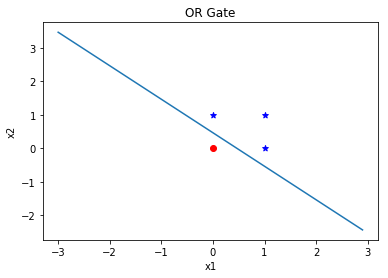

In [4]:
filename = 'trainData/OR_in.txt'

data = get_data(filename)
x = np.delete(data, -1, axis=1) # 刪除最後一列後得到x1、x2
t = np.hsplit(data, 3)[2].ravel() # 取得最後一列，並轉成一維陣列

# w0 = 0.1
# w = np.array([0.7, -0.5, w0])
theta = 1 #-0.2
# learnRate = 0.9 #0.2
w0 = float(input('input w0: '))
w1 = float(input('input w1: '))
w2 = float(input('input w2: '))
w = np.array([w1, w2, w0])
# theta = float(input('input theta: '))
learnRate = float(input('input learnRate: '))

''' train '''
epoch = 10000
print('Epoch\t輸入x1\t輸入x2\t初始w1\t初始w2\t期望T\t實際Y\t誤差E\t修正後w1\t修正後w2')
train(epoch, x, theta, w, t, learnRate)